For more football coding tutorials, follow the **Python Football Review** on [Substack](https://substack.com/@martinondata), or visit [PythonFootball.com](https://www.pythonfootball.com)

---



In [1]:
import polars as pl
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import spearmanr

# Collect

In [2]:
seasons_list = ['1516', '1617', '1718', '1819', '1920',
                '2021', '2122', '2223', '2324', '2425']

results_data_import = []

for season in seasons_list:
    url = f"https://www.football-data.co.uk/mmz4281/{season}/E0.csv"

    season_data = pl.read_csv(
        url,
        try_parse_dates=True,
        columns=["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"])

    starting_year = 2000 + int(season[2:4])
    season_data = season_data.with_columns(pl.lit(starting_year).alias("season"))

    results_data_import.append(season_data)

results_data = pl.concat(results_data_import)
results_data

Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season
str,date,str,str,i64,i64,str,i32
"""E0""",2015-08-08,"""Bournemouth""","""Aston Villa""",0,1,"""A""",2016
"""E0""",2015-08-08,"""Chelsea""","""Swansea""",2,2,"""D""",2016
"""E0""",2015-08-08,"""Everton""","""Watford""",2,2,"""D""",2016
"""E0""",2015-08-08,"""Leicester""","""Sunderland""",4,2,"""H""",2016
"""E0""",2015-08-08,"""Man United""","""Tottenham""",1,0,"""H""",2016
…,…,…,…,…,…,…,…
"""E0""",2025-05-25,"""Newcastle""","""Everton""",0,1,"""A""",2025
"""E0""",2025-05-25,"""Nott'm Forest""","""Chelsea""",0,1,"""A""",2025
"""E0""",2025-05-25,"""Southampton""","""Arsenal""",1,2,"""A""",2025


# Wrangle

In [3]:
results_data = results_data.rename(
    {c: c.lower() for c in results_data.columns})

results_data

div,date,hometeam,awayteam,fthg,ftag,ftr,season
str,date,str,str,i64,i64,str,i32
"""E0""",2015-08-08,"""Bournemouth""","""Aston Villa""",0,1,"""A""",2016
"""E0""",2015-08-08,"""Chelsea""","""Swansea""",2,2,"""D""",2016
"""E0""",2015-08-08,"""Everton""","""Watford""",2,2,"""D""",2016
"""E0""",2015-08-08,"""Leicester""","""Sunderland""",4,2,"""H""",2016
"""E0""",2015-08-08,"""Man United""","""Tottenham""",1,0,"""H""",2016
…,…,…,…,…,…,…,…
"""E0""",2025-05-25,"""Newcastle""","""Everton""",0,1,"""A""",2025
"""E0""",2025-05-25,"""Nott'm Forest""","""Chelsea""",0,1,"""A""",2025
"""E0""",2025-05-25,"""Southampton""","""Arsenal""",1,2,"""A""",2025


In [4]:
home_df = (
    results_data
    .select([
        pl.col("div"),
        pl.col("season"),
        pl.col("date"),
        pl.col("hometeam").alias("team"),
        pl.col("awayteam"),
        pl.col("fthg").alias("gf"),
        pl.col("ftag").alias("ga"),
        pl.col("ftr"),
    ])
    .with_columns([
        pl.when(pl.col("ftr") == "H").then(3)
         .when(pl.col("ftr") == "D").then(1)
         .otherwise(0)
         .alias("points"),
        (pl.col("gf") - pl.col("ga")).alias("gd")
    ])
    .drop("awayteam", "ftr")
)
home_df

div,season,date,team,gf,ga,points,gd
str,i32,date,str,i64,i64,i32,i64
"""E0""",2016,2015-08-08,"""Bournemouth""",0,1,0,-1
"""E0""",2016,2015-08-08,"""Chelsea""",2,2,1,0
"""E0""",2016,2015-08-08,"""Everton""",2,2,1,0
"""E0""",2016,2015-08-08,"""Leicester""",4,2,3,2
"""E0""",2016,2015-08-08,"""Man United""",1,0,3,1
…,…,…,…,…,…,…,…
"""E0""",2025,2025-05-25,"""Newcastle""",0,1,0,-1
"""E0""",2025,2025-05-25,"""Nott'm Forest""",0,1,0,-1
"""E0""",2025,2025-05-25,"""Southampton""",1,2,0,-1


In [5]:
away_df = (
    results_data
    .select([
        pl.col("div"),
        pl.col("season"),
        pl.col("date"),
        pl.col("awayteam").alias("team"),
        pl.col("hometeam"),
        pl.col("ftag").alias("gf"),
        pl.col("fthg").alias("ga"),
        pl.col("ftr"),
    ])
    .with_columns([
        pl.when(pl.col("ftr") == "A").then(3)
         .when(pl.col("ftr") == "D").then(1)
         .otherwise(0)
         .alias("points"),
        (pl.col("gf") - pl.col("ga")).alias("gd")
    ])
    .drop("hometeam", "ftr")
)
away_df

div,season,date,team,gf,ga,points,gd
str,i32,date,str,i64,i64,i32,i64
"""E0""",2016,2015-08-08,"""Aston Villa""",1,0,3,1
"""E0""",2016,2015-08-08,"""Swansea""",2,2,1,0
"""E0""",2016,2015-08-08,"""Watford""",2,2,1,0
"""E0""",2016,2015-08-08,"""Sunderland""",2,4,0,-2
"""E0""",2016,2015-08-08,"""Tottenham""",0,1,0,-1
…,…,…,…,…,…,…,…
"""E0""",2025,2025-05-25,"""Everton""",1,0,3,1
"""E0""",2025,2025-05-25,"""Chelsea""",1,0,3,1
"""E0""",2025,2025-05-25,"""Arsenal""",2,1,3,1


In [6]:
team_matches = pl.concat([home_df, away_df])
team_matches = team_matches.sort(["team", "season", "date"])
team_matches

div,season,date,team,gf,ga,points,gd
str,i32,date,str,i64,i64,i32,i64
"""E0""",2016,2015-08-09,"""Arsenal""",0,2,0,-2
"""E0""",2016,2015-08-16,"""Arsenal""",2,1,3,1
"""E0""",2016,2015-08-24,"""Arsenal""",0,0,1,0
"""E0""",2016,2015-08-29,"""Arsenal""",1,0,3,1
"""E0""",2016,2015-09-12,"""Arsenal""",2,0,3,2
…,…,…,…,…,…,…,…
"""E0""",2025,2025-04-26,"""Wolves""",3,0,3,3
"""E0""",2025,2025-05-02,"""Wolves""",0,1,0,-1
"""E0""",2025,2025-05-10,"""Wolves""",0,2,0,-2


In [7]:
team_progress = (
    team_matches
    .with_columns([
        pl.col("date").cum_count().over(["team", "season"]).alias("matchweek"),
        pl.col("points").cum_sum().over(["team", "season"]).alias("cum_points"),
        pl.col("gf").cum_sum().over(["team", "season"]).alias("cum_gf"),
        pl.col("ga").cum_sum().over(["team", "season"]).alias("cum_ga"),
        pl.col("gd").cum_sum().over(["team", "season"]).alias("cum_gd"),
    ])
    .select([
        "div", "season", "team", "date", "matchweek",
        "cum_points", "cum_gf", "cum_ga", "cum_gd"
    ])
)

team_progress

div,season,team,date,matchweek,cum_points,cum_gf,cum_ga,cum_gd
str,i32,str,date,u32,i32,i64,i64,i64
"""E0""",2016,"""Arsenal""",2015-08-09,1,0,0,2,-2
"""E0""",2016,"""Arsenal""",2015-08-16,2,3,2,3,-1
"""E0""",2016,"""Arsenal""",2015-08-24,3,4,2,3,-1
"""E0""",2016,"""Arsenal""",2015-08-29,4,7,3,3,0
"""E0""",2016,"""Arsenal""",2015-09-12,5,10,5,3,2
…,…,…,…,…,…,…,…,…
"""E0""",2025,"""Wolves""",2025-04-26,34,41,51,61,-10
"""E0""",2025,"""Wolves""",2025-05-02,35,41,51,62,-11
"""E0""",2025,"""Wolves""",2025-05-10,36,41,51,64,-13


In [9]:
team_ranked = (
    team_progress
    .sort(["season", "matchweek", "cum_points", "cum_gd", "cum_gf"],
          descending=[False, False, True, True, True])
    .with_columns(
        pl.arange(1, pl.count() + 1).over(["season", "matchweek"]).alias("cum_pos"))
    .select(["div", "season", "team", "date", "matchweek",
             "cum_points", "cum_gf", "cum_ga", "cum_gd", "cum_pos"])
)

team_ranked

/tmp/ipython-input-2245628327.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.arange(1, pl.count() + 1).over(["season", "matchweek"]).alias("cum_pos"))


div,season,team,date,matchweek,cum_points,cum_gf,cum_ga,cum_gd,cum_pos
str,i32,str,date,u32,i32,i64,i64,i64,i64
"""E0""",2016,"""Man City""",2015-08-10,1,3,3,0,3,1
"""E0""",2016,"""Leicester""",2015-08-08,1,3,4,2,2,2
"""E0""",2016,"""Crystal Palace""",2015-08-08,1,3,3,1,2,3
"""E0""",2016,"""West Ham""",2015-08-09,1,3,2,0,2,4
"""E0""",2016,"""Man United""",2015-08-08,1,3,1,0,1,5
…,…,…,…,…,…,…,…,…,…
"""E0""",2025,"""Wolves""",2025-05-25,38,42,54,69,-15,16
"""E0""",2025,"""Tottenham""",2025-05-25,38,38,64,65,-1,17
"""E0""",2025,"""Leicester""",2025-05-25,38,25,33,80,-47,18


In [10]:
final_table = (
    team_ranked
    .group_by("season")
    .agg(pl.col("matchweek").max().alias("final_week"))
    .join(team_ranked, on=["season"])
    .filter(pl.col("matchweek") == pl.col("final_week"))
    .select(["div", "season", "team", "cum_points", "cum_gd", "cum_gf"])
)

# Step 2: find groups of teams with identical Pts, GD, and GF
potential_ties = (
    final_table
    .group_by(["season", "cum_points", "cum_gd", "cum_gf"])
    .agg(pl.col("team").alias("teams"))
    .filter(pl.col("teams").list.len() > 1)
)

potential_ties


season,cum_points,cum_gd,cum_gf,teams
i32,i32,i64,i64,list[str]


# Analysis

Step 1: keep essentials

In [11]:
df = team_ranked.select(["div", "season", "team", "matchweek", "cum_pos"])
df

div,season,team,matchweek,cum_pos
str,i32,str,u32,i64
"""E0""",2016,"""Man City""",1,1
"""E0""",2016,"""Leicester""",1,2
"""E0""",2016,"""Crystal Palace""",1,3
"""E0""",2016,"""West Ham""",1,4
"""E0""",2016,"""Man United""",1,5
…,…,…,…,…
"""E0""",2025,"""Wolves""",38,16
"""E0""",2025,"""Tottenham""",38,17
"""E0""",2025,"""Leicester""",38,18


In [12]:
# Step 2: get final positions
final_positions = (
    df.filter(pl.col("matchweek") == 38)
      .select(["div", "season", "team", pl.col("cum_pos").alias("final_pos")])
)
final_positions

div,season,team,final_pos
str,i32,str,i64
"""E0""",2016,"""Leicester""",1
"""E0""",2016,"""Arsenal""",2
"""E0""",2016,"""Tottenham""",3
"""E0""",2016,"""Man City""",4
"""E0""",2016,"""Man United""",5
…,…,…,…
"""E0""",2025,"""Wolves""",16
"""E0""",2025,"""Tottenham""",17
"""E0""",2025,"""Leicester""",18


In [13]:
merged = df.join(final_positions, on=["season", "team", "div"])
merged

div,season,team,matchweek,cum_pos,final_pos
str,i32,str,u32,i64,i64
"""E0""",2016,"""Man City""",1,1,4
"""E0""",2016,"""Leicester""",1,2,1
"""E0""",2016,"""Crystal Palace""",1,3,15
"""E0""",2016,"""West Ham""",1,4,7
"""E0""",2016,"""Man United""",1,5,5
…,…,…,…,…,…
"""E0""",2025,"""Wolves""",38,16,16
"""E0""",2025,"""Tottenham""",38,17,17
"""E0""",2025,"""Leicester""",38,18,18


In [14]:
correlations = []
for week in range(1, 39):

    tmp = merged.filter(pl.col("matchweek") == week)

    corr = spearmanr(tmp["cum_pos"], tmp["final_pos"]).correlation

    correlations.append({"matchweek": week, "correlation": corr})

corr_df = pl.DataFrame(correlations)
corr_df

matchweek,correlation
i64,f64
1,0.467368
2,0.484361
3,0.561805
4,0.642707
5,0.666617
…,…
34,0.963459
35,0.97609
36,0.982556


# Plot

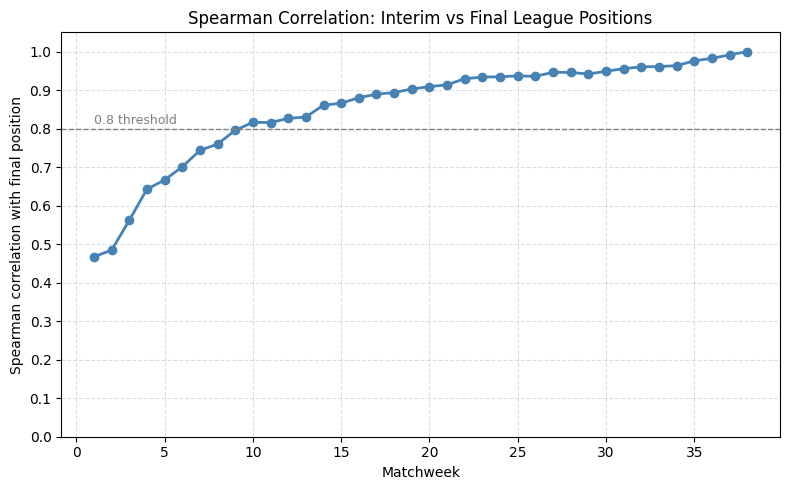

In [16]:
plt.figure(figsize=(8,5))
plt.plot(corr_df["matchweek"], corr_df["correlation"], marker='o', color='steelblue', linewidth=2)

plt.axhline(0.8, color='grey', linestyle='--', linewidth=1)
plt.text(1, 0.805, '0.8 threshold', color='grey', fontsize=9, va='bottom')

plt.yticks(np.arange(0, 1.1, 0.1))

plt.title("Spearman Correlation: Interim vs Final League Positions", fontsize=12)
plt.xlabel("Matchweek")
plt.ylabel("Spearman correlation with final position")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

# All 5 leagues

In [ ]:
# Leagues and seasons
leagues = ['E0', 'I1', 'D1', 'SP1', 'F1']  # England, Italy, Germany, Spain, France
seasons_list = ['1516', '1617', '1718', '1819', '1920',
                '2021', '2122', '2223', '2324', '2425']

# Collect data for all leagues
results_data_import = []

for league in leagues:
    for season in seasons_list:
        url = f"https://www.football-data.co.uk/mmz4281/{season}/{league}.csv"

        season_data = pl.read_csv(
            url,
            try_parse_dates=True,
            columns=["Div", "Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR"]
        )
        starting_year = 2000 + int(season[2:4])
        season_data = season_data.with_columns(pl.lit(starting_year).alias("season"))
        results_data_import.append(season_data)


results_data = pl.concat(results_data_import)

# Wrangle
results_data = results_data.rename({c: c.lower() for c in results_data.columns})

home_df = (
    results_data
    .select(["div", "season", "date", pl.col("hometeam").alias("team"),
             pl.col("awayteam"), pl.col("fthg").alias("gf"), pl.col("ftag").alias("ga"), pl.col("ftr")])
    .with_columns([
        pl.when(pl.col("ftr") == "H").then(3)
         .when(pl.col("ftr") == "D").then(1)
         .otherwise(0)
         .alias("points"),
        (pl.col("gf") - pl.col("ga")).alias("gd")
    ])
    .drop("awayteam", "ftr")
)

away_df = (
    results_data
    .select(["div", "season", "date", pl.col("awayteam").alias("team"),
             pl.col("hometeam"), pl.col("ftag").alias("gf"), pl.col("fthg").alias("ga"), pl.col("ftr")])
    .with_columns([
        pl.when(pl.col("ftr") == "A").then(3)
         .when(pl.col("ftr") == "D").then(1)
         .otherwise(0)
         .alias("points"),
        (pl.col("gf") - pl.col("ga")).alias("gd")
    ])
    .drop("hometeam", "ftr")
)

team_matches = pl.concat([home_df, away_df]).sort(["div", "team", "season", "date"])

team_progress = (
    team_matches
    .with_columns([
        pl.col("date").cum_count().over(["div", "team", "season"]).alias("matchweek"),
        pl.col("points").cum_sum().over(["div", "team", "season"]).alias("cum_points"),
        pl.col("gf").cum_sum().over(["div", "team", "season"]).alias("cum_gf"),
        pl.col("ga").cum_sum().over(["div", "team", "season"]).alias("cum_ga"),
        pl.col("gd").cum_sum().over(["div", "team", "season"]).alias("cum_gd"),
    ])
    .select(["div", "season", "team", "date", "matchweek", "cum_points", "cum_gf", "cum_ga", "cum_gd"])
)

team_ranked = (
    team_progress
    .sort(["div", "season", "matchweek", "cum_points", "cum_gd", "cum_gf"], descending=[False, False, False, True, True, True])
    .with_columns(pl.arange(1, pl.count() + 1).over(["div", "season", "matchweek"]).alias("cum_pos"))
)

# Compute correlations per league
league_correlations = {}

for league in leagues:
    df = team_ranked.filter(pl.col("div") == league).select(["div", "season", "team", "matchweek", "cum_pos"])

    # Find max matchweek per season (not always 38)
    max_weeks = df.group_by("season").agg(pl.col("matchweek").max().alias("final_week"))

    # Join final positions
    final_positions = (
        df.join(max_weeks, on="season")
          .filter(pl.col("matchweek") == pl.col("final_week"))
          .select(["div", "season", "team", pl.col("cum_pos").alias("final_pos")])
    )

    merged = df.join(final_positions, on=["div", "season", "team"])

    # Compute correlations for each matchweek up to league-specific max
    max_matchweek = int(df["matchweek"].max())
    correlations = []
    for week in range(1, max_matchweek + 1):
        tmp = merged.filter(pl.col("matchweek") == week)
        if tmp.height > 0:
            corr = spearmanr(tmp["cum_pos"], tmp["final_pos"]).correlation
            correlations.append({"matchweek": week, "correlation": corr})

    league_correlations[league] = pl.DataFrame(correlations)

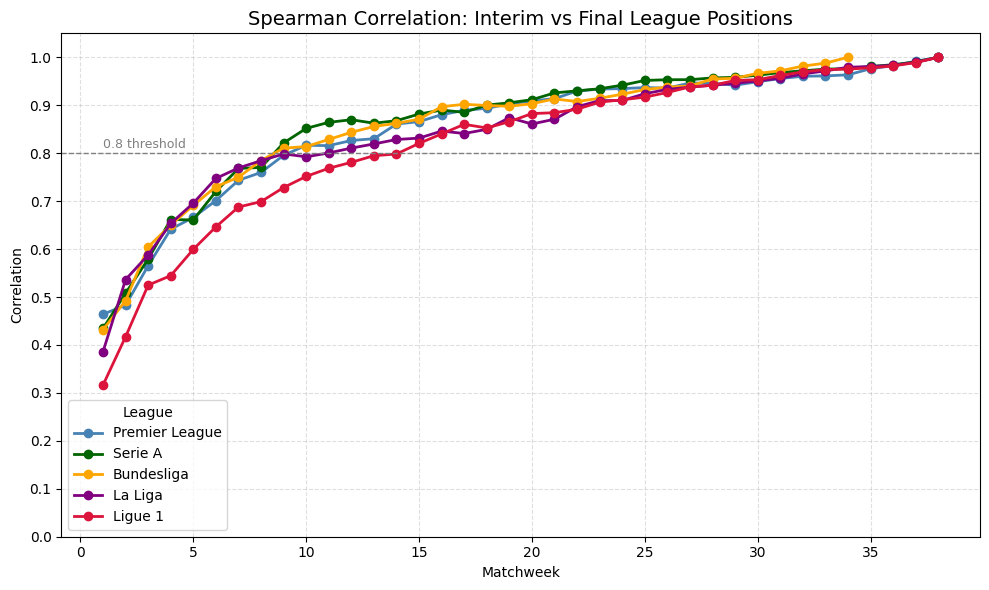

In [21]:
# Map short codes to full league names
league_names = {
    "E0": "Premier League",
    "I1": "Serie A",
    "D1": "Bundesliga",
    "SP1": "La Liga",
    "F1": "Ligue 1"
}

# Plot all leagues
plt.figure(figsize=(10, 6))
colors = {"E0": "steelblue", "I1": "darkgreen", "D1": "orange", "SP1": "purple", "F1": "crimson"}

for league, corr_df in league_correlations.items():
    plt.plot(
        corr_df["matchweek"],
        corr_df["correlation"],
        marker='o',
        linewidth=2,
        color=colors[league],
        label=league_names.get(league, league)  # use full name
    )

plt.axhline(0.8, color='grey', linestyle='--', linewidth=1)
plt.text(1, 0.805, '0.8 threshold', color='grey', fontsize=9, va='bottom')
plt.yticks(np.arange(0, 1.1, 0.1))

plt.title("Spearman Correlation: Interim vs Final League Positions", fontsize=14)
plt.xlabel("Matchweek")
plt.ylabel("Correlation")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="League")
plt.tight_layout()
plt.show()